# 1. Install Dependencies and Setup

In [2]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data 

In [59]:
import tensorflow as tf
import os

In [60]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [61]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [62]:
import cv2
import imghdr

C:\Users\siddd\AppData\Local\Temp\ipykernel_18768\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [85]:
train_dir = r"C:\Users\siddd\AI ML\GREEN AI\widlife detection\TRAIN"
valid_dir = r"C:\Users\siddd\AI ML\GREEN AI\widlife detection\VALID"

In [86]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [87]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# 3. Load Data

In [88]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3583 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()

In [91]:
batch = data_iterator.next()

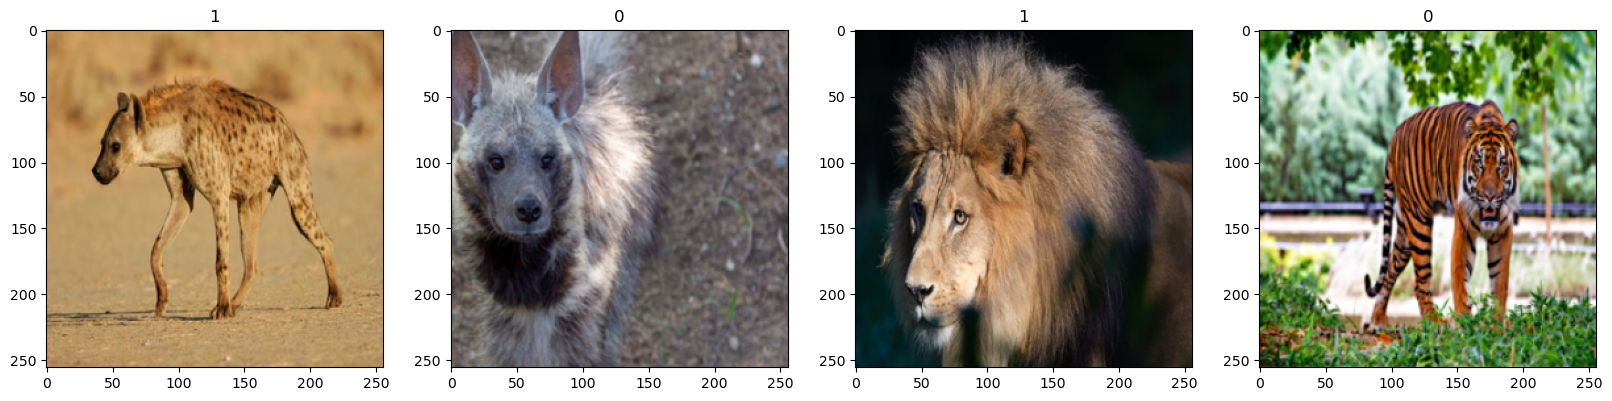

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [93]:
len(data)

112

In [94]:
data = data.map(lambda x,y: (x/255, y))

In [95]:
data.as_numpy_iterator().next()

(array([[[[0.18039216, 0.16862746, 0.14901961],
          [0.18039216, 0.16862746, 0.14901961],
          [0.16960785, 0.15784314, 0.1382353 ],
          ...,
          [0.33259803, 0.34607843, 0.32254902],
          [0.42794117, 0.425     , 0.40220588],
          [0.54901963, 0.53333336, 0.5137255 ]],
 
         [[0.15171568, 0.13995098, 0.12034313],
          [0.14912684, 0.13736214, 0.11775429],
          [0.1377451 , 0.12598039, 0.10637255],
          ...,
          [0.4490962 , 0.45719975, 0.4496017 ],
          [0.5149663 , 0.50943625, 0.50197613],
          [0.6127451 , 0.59705883, 0.5901961 ]],
 
         [[0.14509805, 0.13333334, 0.11372549],
          [0.14191176, 0.13014705, 0.11053921],
          [0.1322457 , 0.12048101, 0.10087316],
          ...,
          [0.60185355, 0.6031556 , 0.614568  ],
          [0.6203125 , 0.61418504, 0.6242494 ],
          [0.6732843 , 0.657598  , 0.6698529 ]],
 
         ...,
 
         [[0.9164216 , 0.90563726, 0.91887254],
          [0.90526

# 5. Split Data

In [96]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [97]:
train_size, val_size, test_size, len(data)

(78, 22, 11, 112)

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [104]:
logdir='logs'

In [105]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
train = tf.keras.utils.image_dataset_from_directory(
    'C:\Users\siddd\AI ML\GREEN AI\widlife detection\TRAIN',
    image_size=(224, 224),
    batch_size=32
)

val = tf.keras.utils.image_dataset_from_directory(
    'C:\Users\siddd\AI ML\GREEN AI\widlife detection\VALID',
    image_size=(224, 224),
    batch_size=32
)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3517033155.py, line 2)

In [106]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
21/78 ━━━━━━━━━━━━━━━━━━━━ 26s 462ms/step - accuracy: 0.5021 - loss: 0.7413

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_9837]

# 8. Plot Performance

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xticks([len(hist.history['loss']) - 1], [len(hist.history['loss'])])
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

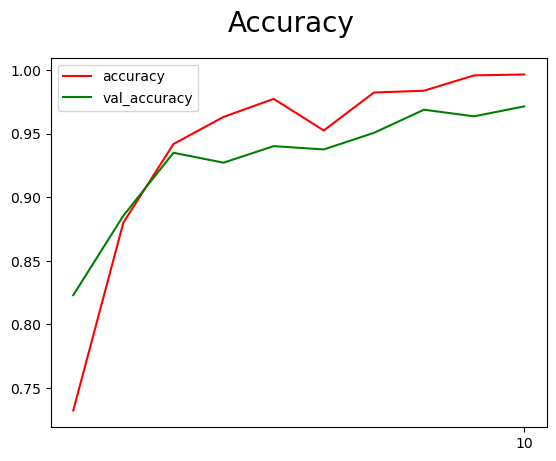

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xticks([len(hist.history['accuracy']) - 1], [len(hist.history['accuracy'])])
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 285ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9886364, shape=(), dtype=float32) tf.Tensor(0.96666664, shape=(), dtype=float32) tf.Tensor(0.9791667, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

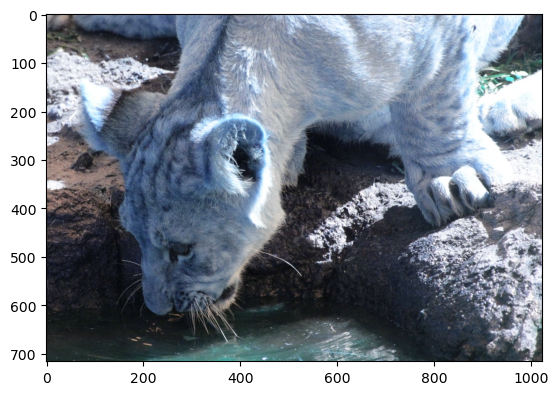

In [ ]:
img = cv2.imread(r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train\lion\f8958a678cb30004.jpg')
# img = cv2.imread(r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train\leopard\d2906b26acd16403.jpg')
plt.imshow(img)
plt.show()

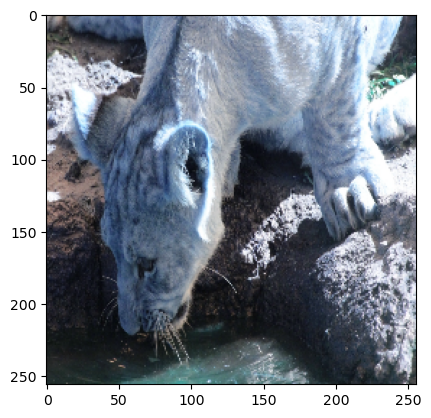

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
yhat

array([[0.99999547]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is lion')
else:
    print(f'Predicted class is leopard')

Predicted class is lion
